## Dataset ===>> https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data

In [1]:
import numpy as np 
import pandas as pd 

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [2]:
data = pd.read_csv("./../data/raw/Breast Cancer Wisconsin/data.csv")

In [3]:
data.head()

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimeter_worst  area_worst  smoothness_worst  \
0  ...          17.33           184.60      2019.0            0.1622   
1  ...          23.41           158.80      1956.0            0.1238   
2  ...          25.53           152.50      1709.0            0.1444   
3  ...          26.50            98.87       567.7            0.2098   
4  ...          16.67           152.20      1575.0            0.1374   

   compactness_worst  concavity_worst  concave points_worst  symmetry_worst  \
0             0.6656           0.7119                0.2654          0.4601   
1             0.1866           0.2416                0.1860          0.2750   
2             0.4245           0.4504                0.2430          0.3613   
3             0.8663           0.6869                0.2575          0.6638   
4             0.2050           0.4000                0.1625          0.2364   

   fractal_dimension_worst  Unnamed: 32  
0                  0.11890          NaN  
1                  0.08902          NaN  
2                  0.08758          NaN  
3                  0.17300          NaN  
4                  0.07678          NaN  

[5 rows x 33 columns]

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [5]:
# Rename column mapping
rename_mapping = {
    "radius_mean": "mean radius",
    "texture_mean": "mean texture",
    "perimeter_mean": "mean perimeter",
    "area_mean": "mean area",
    "smoothness_mean": "mean smoothness",
    "compactness_mean": "mean compactness",
    "concavity_mean": "mean concavity",
    "concave points_mean": "mean concave points",
    "symmetry_mean": "mean symmetry",
    "fractal_dimension_mean": "mean fractal dimension",
    "radius_se": "radius error",
    "texture_se": "texture error",
    "perimeter_se": "perimeter error",
    "area_se": "area error",
    "smoothness_se": "smoothness error",
    "compactness_se": "compactness error",
    "concavity_se": "concavity error",
    "concave points_se": "concave points error",
    "symmetry_se": "symmetry error",
    "fractal_dimension_se": "fractal dimension error",
    "radius_worst": "worst radius",
    "texture_worst": "worst texture",
    "perimeter_worst": "worst perimeter",
    "area_worst": "worst area",
    "smoothness_worst": "worst smoothness",
    "compactness_worst": "worst compactness",
    "concavity_worst": "worst concavity",
    "concave points_worst": "worst concave points",
    "symmetry_worst": "worst symmetry",
    "fractal_dimension_worst": "worst fractal dimension",
    "diagnosis": "target"
}

# Rename columns
data = data.rename(columns=rename_mapping)

# Keep only the renamed columns and drop the rest
data = data[list(rename_mapping.values())]

# Display the updated DataFrame info
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [10]:
# Map target values (example: M -> 1.0, B -> 0.0)
data['target'] = data['target'].replace({
    'M': 1.0,  # Malignant
    'B': 0.0   # Benign
})

# Convert to float
data['target'] = data['target'].astype(float)

In [11]:
data.head()

mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0                 0.07871  ...          17.33           184.60      2019.0   
1                 0.05667  ...          23.41           158.80      1956.0   
2                 0.05999  ...          25.53           152.50      1709.0   
3                 0.09744  ...          26.50            98.87       567.7   
4                 0.05883  ...          16.67           152.20      1575.0   

   worst smoothness  worst compactness  worst concavity  worst concave points  \
0            0.1622             0.6656           0.7119                0.2654   
1            0.1238             0.1866           0.2416                0.1860   
2            0.1444             0.4245           0.4504                0.2430   
3            0.2098             0.8663           0.6869                0.2575   
4            0.1374             0.2050           0.4000                0.1625   

   worst symmetry  worst fractal dimension  target  
0          0.4601                  0.11890     1.0  
1          0.2750                  0.08902     1.0  
2          0.3613                  0.08758     1.0  
3          0.6638                  0.17300     1.0  
4          0.2364                  0.07678     1.0  

[5 rows x 31 columns]

In [12]:
data.describe()

mean radius  mean texture  mean perimeter    mean area  \
count   569.000000    569.000000      569.000000   569.000000   
mean     14.127292     19.289649       91.969033   654.889104   
std       3.524049      4.301036       24.298981   351.914129   
min       6.981000      9.710000       43.790000   143.500000   
25%      11.700000     16.170000       75.170000   420.300000   
50%      13.370000     18.840000       86.240000   551.100000   
75%      15.780000     21.800000      104.100000   782.700000   
max      28.110000     39.280000      188.500000  2501.000000   

       mean smoothness  mean compactness  mean concavity  mean concave points  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000             0.000000   
25%           0.086370          0.064920        0.029560             0.020310   
50%           0.095870          0.092630        0.061540             0.033500   
75%           0.105300          0.130400        0.130700             0.074000   
max           0.163400          0.345400        0.426800             0.201200   

       mean symmetry  mean fractal dimension  ...  worst texture  \
count     569.000000              569.000000  ...     569.000000   
mean        0.181162                0.062798  ...      25.677223   
std         0.027414                0.007060  ...       6.146258   
min         0.106000                0.049960  ...      12.020000   
25%         0.161900                0.057700  ...      21.080000   
50%         0.179200                0.061540  ...      25.410000   
75%         0.195700                0.066120  ...      29.720000   
max         0.304000                0.097440  ...      49.540000   

       worst perimeter   worst area  worst smoothness  worst compactness  \
count       569.000000   569.000000        569.000000         569.000000   
mean        107.261213   880.583128          0.132369           0.254265   
std          33.602542   569.356993          0.022832           0.157336   
min          50.410000   185.200000          0.071170           0.027290   
25%          84.110000   515.300000          0.116600           0.147200   
50%          97.660000   686.500000          0.131300           0.211900   
75%         125.400000  1084.000000          0.146000           0.339100   
max         251.200000  4254.000000          0.222600           1.058000   

       worst concavity  worst concave points  worst symmetry  \
count       569.000000            569.000000      569.000000   
mean          0.272188              0.114606        0.290076   
std           0.208624              0.065732        0.061867   
min           0.000000              0.000000        0.156500   
25%           0.114500              0.064930        0.250400   
50%           0.226700              0.099930        0.282200   
75%           0.382900              0.161400        0.317900   
max           1.252000              0.291000        0.663800   

       worst fractal dimension      target  
count               569.000000  569.000000  
mean                  0.083946    0.372583  
std                   0.018061    0.483918  
min                   0.055040    0.000000  
25%                   0.071460    0.000000  
50%                   0.080040    0.000000  
75%                   0.092080    1.000000  
max                   0.207500    1.000000  

[8 rows x 31 columns]

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [14]:
data.columns

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension',
       'target'],
      dtype='object')

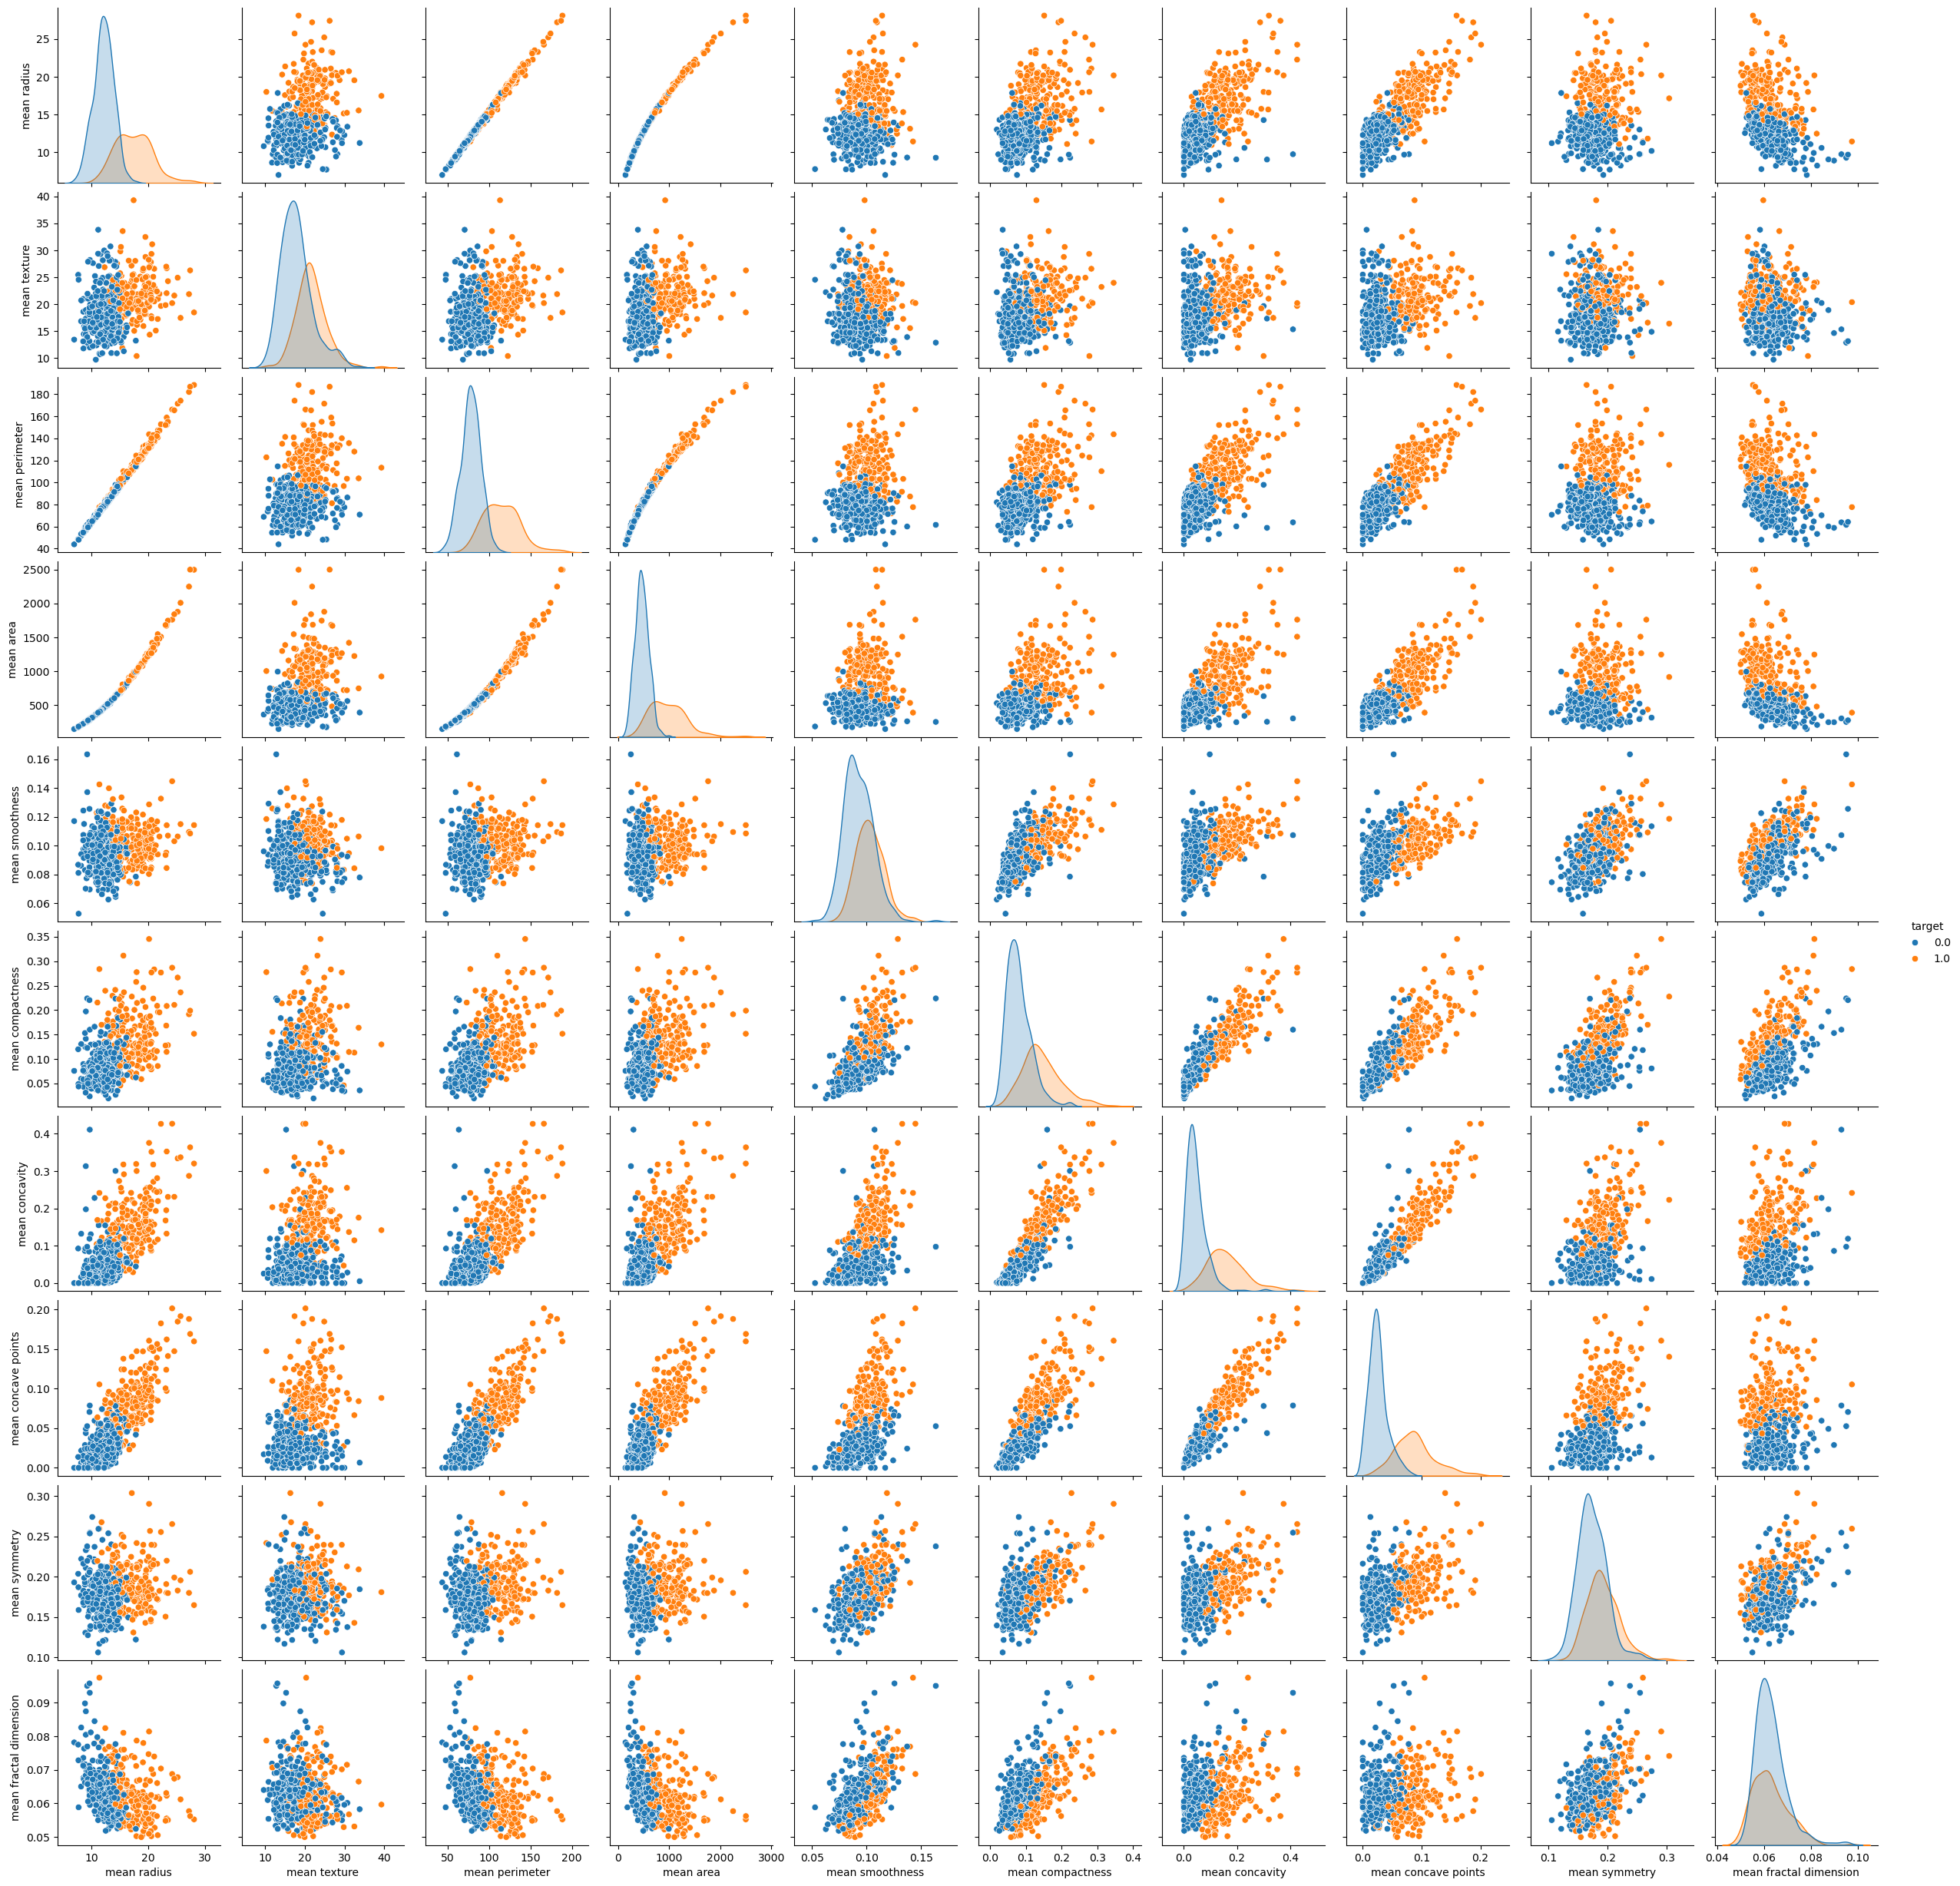

In [16]:
# Define the list of variables to be plotted
plot_vars = [
    'mean radius', 'mean texture', 'mean perimeter', 'mean area', 
    'mean smoothness', 'mean compactness', 'mean concavity',
    'mean concave points', 'mean symmetry', 'mean fractal dimension'
]

# Create a pair plot with hue
sns.pairplot(data, hue='target', vars=plot_vars)


In [17]:
# Set global figure size and style for consistency
sns.set_theme(style="whitegrid")

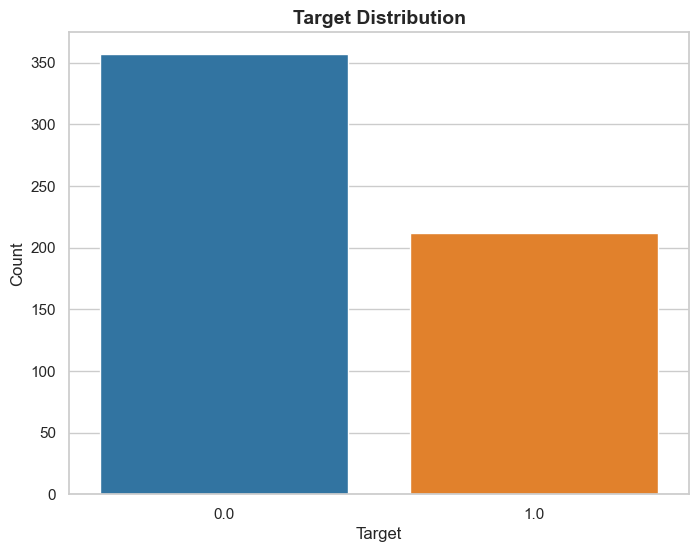

In [22]:
# Plot 1: Count plot of target distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='target', data=data, palette=['#1f77b4', '#ff7f0e'])
plt.title("Target Distribution", fontsize=14, fontweight="bold")
plt.xlabel("Target", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.show()


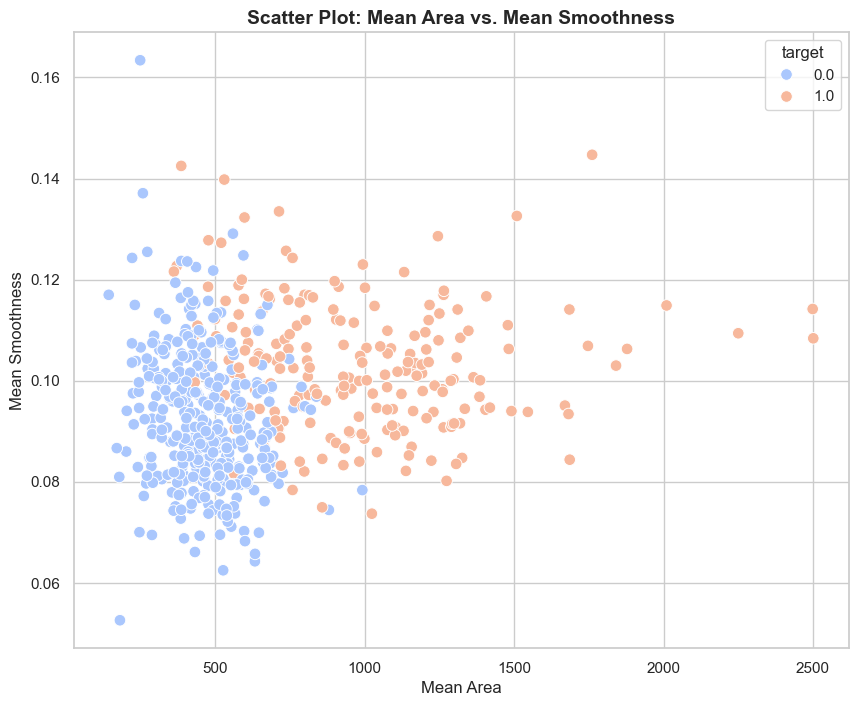

In [19]:
# Plot 2: Scatter plot of 'mean area' vs 'mean smoothness' with hue for target
plt.figure(figsize=(10, 8))
sns.scatterplot(x='mean area', y='mean smoothness', hue='target', data=data, palette='coolwarm', s=70)
plt.title("Scatter Plot: Mean Area vs. Mean Smoothness", fontsize=14, fontweight="bold")
plt.xlabel("Mean Area", fontsize=12)
plt.ylabel("Mean Smoothness", fontsize=12)
plt.show()

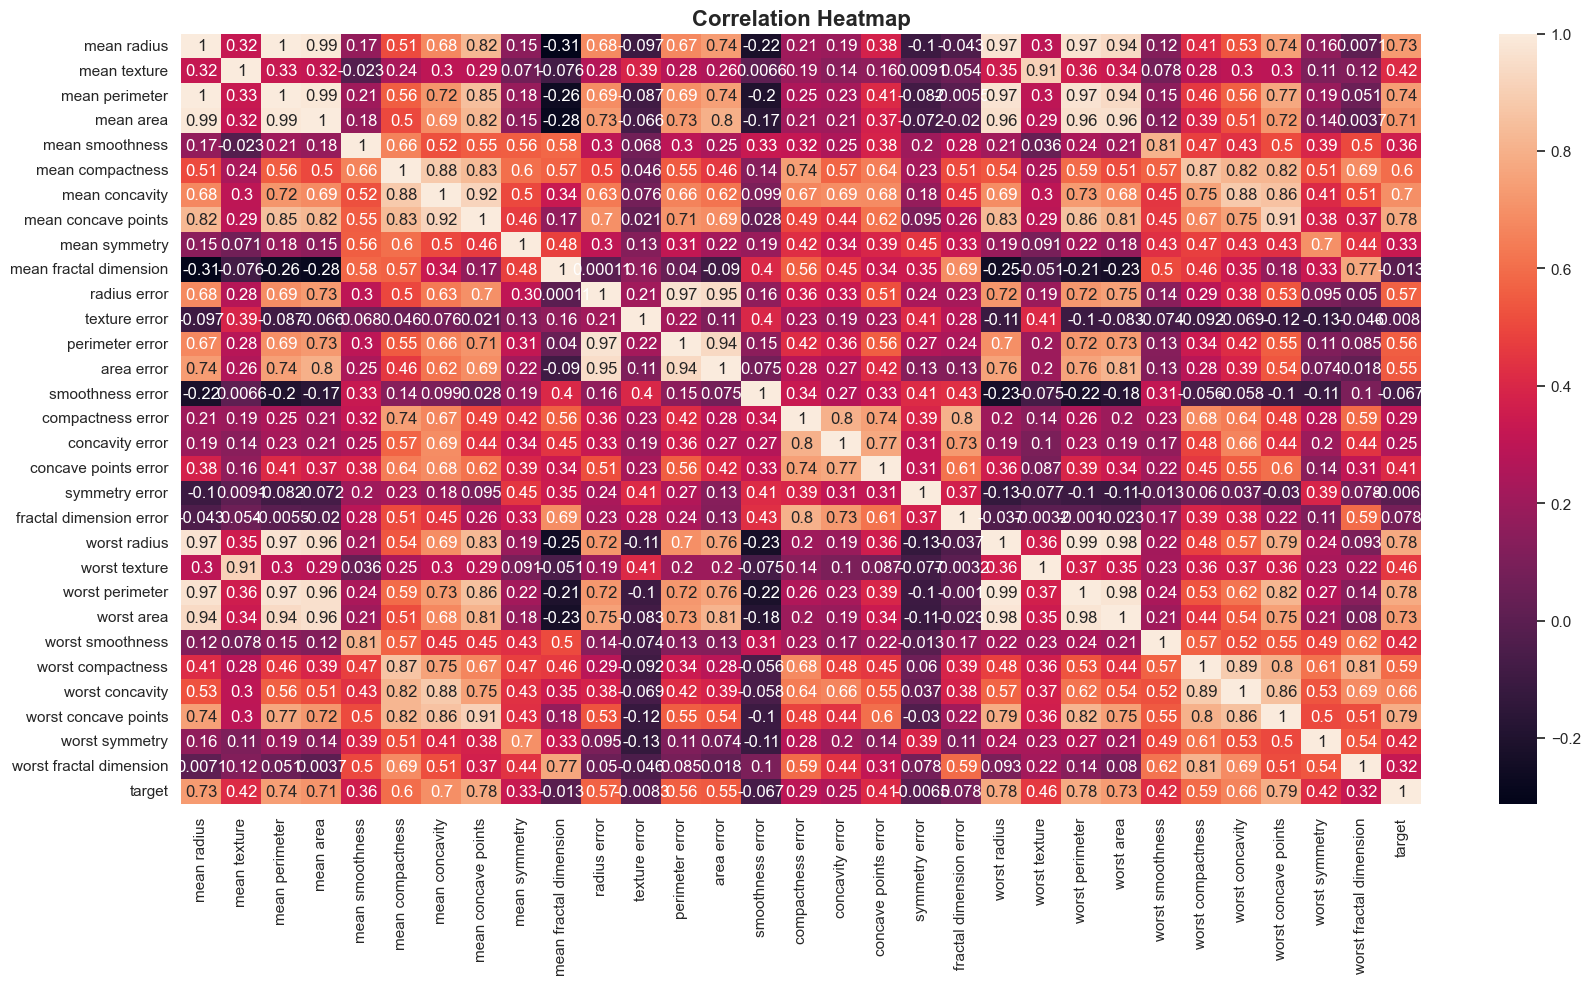

In [21]:
# Plot 3: Correlation heatmap with annotations
plt.figure(figsize=(20, 10))
sns.heatmap(data.corr(), annot=True)
plt.title("Correlation Heatmap", fontsize=16, fontweight="bold")
plt.show()

## Model Building

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Splitting features and target
X = data.drop(columns=['target'])
y = data['target']

# Display shapes of features and target
print(f"'X' shape: {X.shape}")
print(f"'y' shape: {y.shape}")

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Apply scaling to the features using StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform both train and test sets
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Scaling complete. Data is ready for model training and evaluation.")


'X' shape: (569, 30)
'y' shape: (569,)
Scaling complete. Data is ready for model training and evaluation.


In [24]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    # Determine dataset and labels based on the train flag
    if train:
        data, labels, dataset_type = X_train, y_train, "Train"
    else:
        data, labels, dataset_type = X_test, y_test, "Test"
    
    # Generate predictions and evaluation metrics
    pred = clf.predict(data)
    clf_report = pd.DataFrame(classification_report(labels, pred, output_dict=True))
    accuracy = accuracy_score(labels, pred) * 100
    conf_matrix = confusion_matrix(labels, pred)

    # Print results
    print(f"{dataset_type} Result:\n{'=' * 48}")
    print(f"Accuracy Score: {accuracy:.2f}%")
    print("Classification Report:")
    print(clf_report)
    print("Confusion Matrix:")
    print(conf_matrix)
    print("\n")

# Example Usage:
# Assuming `clf` is your trained classifier:
# print_score(clf, X_train_scaled, y_train, X_test_scaled, y_test, train=True)
# print_score(clf, X_train_scaled, y_train, X_test_scaled, y_test, train=False)


### 1. Linear Kernel SVM

In [25]:
from sklearn.svm import LinearSVC

# Initialize and train the model
model = LinearSVC()
model.fit(X_train, y_train)

# Evaluate on both training and test datasets
for dataset_type, X_data, y_data in [("Train", X_train, y_train), ("Test", X_test, y_test)]:
    print(f"\nEvaluating on {dataset_type} dataset...")
    print_score(model, X_data, y_data, X_test, y_test, train=(dataset_type == "Train"))



Evaluating on Train dataset...
Train Result:
Accuracy Score: 96.48%
Classification Report:
                  0.0         1.0  accuracy   macro avg  weighted avg
precision    0.964427    0.965517  0.964824    0.964972      0.964835
recall       0.979920    0.939597  0.964824    0.959758      0.964824
f1-score     0.972112    0.952381  0.964824    0.962246      0.964725
support    249.000000  149.000000  0.964824  398.000000    398.000000
Confusion Matrix:
[[244   5]
 [  9 140]]



Evaluating on Test dataset...
Test Result:
Accuracy Score: 97.08%
Classification Report:
                  0.0        1.0  accuracy   macro avg  weighted avg
precision    0.972477   0.967742   0.97076    0.970109      0.970733
recall       0.981481   0.952381   0.97076    0.966931      0.970760
f1-score     0.976959   0.960000   0.97076    0.968479      0.970711
support    108.000000  63.000000   0.97076  171.000000    171.000000
Confusion Matrix:
[[106   2]
 [  3  60]]




### 2. Polynomial Kernel SVM

In [26]:
from sklearn.svm import SVC

# Initialize the SVC model with polynomial kernel and specified hyperparameters
model = SVC(kernel='poly', degree=2, gamma='auto', coef0=1, C=5)

# Train the model on the training data
model.fit(X_train, y_train)

# Evaluate on both training and test datasets
for dataset_type, X_data, y_data in [("Train", X_train, y_train), ("Test", X_test, y_test)]:
    print(f"\nEvaluating on {dataset_type} dataset...")
    print_score(model, X_data, y_data, X_test, y_test, train=(dataset_type == "Train"))



Evaluating on Train dataset...
Train Result:
Accuracy Score: 96.98%
Classification Report:
                  0.0         1.0  accuracy   macro avg  weighted avg
precision    0.961089    0.985816  0.969849    0.973453      0.970346
recall       0.991968    0.932886  0.969849    0.962427      0.969849
f1-score     0.976285    0.958621  0.969849    0.967453      0.969672
support    249.000000  149.000000  0.969849  398.000000    398.000000
Confusion Matrix:
[[247   2]
 [ 10 139]]



Evaluating on Test dataset...
Test Result:
Accuracy Score: 97.08%
Classification Report:
                  0.0        1.0  accuracy   macro avg  weighted avg
precision    0.972477   0.967742   0.97076    0.970109      0.970733
recall       0.981481   0.952381   0.97076    0.966931      0.970760
f1-score     0.976959   0.960000   0.97076    0.968479      0.970711
support    108.000000  63.000000   0.97076  171.000000    171.000000
Confusion Matrix:
[[106   2]
 [  3  60]]




### 3. Radial Kernel SVM

In [27]:
# Initialize the SVC model with RBF kernel and specified hyperparameters
model = SVC(kernel='rbf', gamma=0.5, C=0.1)

# Train the model on the training data
model.fit(X_train, y_train)

# Evaluate model performance on both training and test datasets
datasets = [("Train", X_train, y_train), ("Test", X_test, y_test)]

for dataset_type, X_data, y_data in datasets:
    print(f"\nEvaluating on {dataset_type} dataset...")
    print_score(model, X_data, y_data, X_test, y_test, train=(dataset_type == "Train"))



Evaluating on Train dataset...
Train Result:
Accuracy Score: 62.56%
Classification Report:
                  0.0    1.0  accuracy   macro avg  weighted avg
precision    0.625628    0.0  0.625628    0.312814      0.391411
recall       1.000000    0.0  0.625628    0.500000      0.625628
f1-score     0.769706    0.0  0.625628    0.384853      0.481550
support    249.000000  149.0  0.625628  398.000000    398.000000
Confusion Matrix:
[[249   0]
 [149   0]]



Evaluating on Test dataset...
Test Result:
Accuracy Score: 63.16%
Classification Report:
                  0.0   1.0  accuracy   macro avg  weighted avg
precision    0.631579   0.0  0.631579    0.315789      0.398892
recall       1.000000   0.0  0.631579    0.500000      0.631579
f1-score     0.774194   0.0  0.631579    0.387097      0.488964
support    108.000000  63.0  0.631579  171.000000    171.000000
Confusion Matrix:
[[108   0]
 [ 63   0]]


